# Tensorflow intro

This tutorial shows the basic usage of tensorflow to train neural networks

In [2]:
import tensorflow as tf #pak ještě jeden balíček, dokážejí zkonstruovat objetky jako klasického grafu -> další implementace
import numpy as np
import pandas as pd
import datetime

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

#pro vytvoření dat

Basics of NN
- přidaná nelinearita
- Vrsty- dense layers
- lze vynechávat některé spoje, nebo naopak přidávat
- Ouput -> z toho loss (zajímá nás ten vektor)
- Usefullness klasického grafu: forward (Začnu s inputama -> přidám nelinearity) and backwards propagation (začnu outputem a jdu zpět, zajímá nás derivace výstupu vzhledem ke všem parametrů v prvním dense layer w)

# Simple NN for classification

## Data processing
Read data and convert them to numerical inputs

In [4]:
X, y = make_classification(n_samples=20000, n_features=8, n_informative=5, 
                           n_redundant=0, n_classes=2, random_state=1) #x-matice input (počet pozorování) a y-vektor output

#chci natrenovat neuronku, ktera potom bude schopna modelovat muj input delky n

# Parameters:
#   n_samples: Number of samples (data points) in the dataset
#   n_features: Number of features (independent variables) in the dataset
#   n_informative: Number of informative features (features that contribute to prediction)
#   n_redundant: Number of redundant features (linear combinations of informative features)
#   n_classes: Number of classes (categories) in the target variable
#   random_state: Seed for random number generation, ensures reproducibility

#feature - predictor var
###informative feat: useful and relevant information for making predictions or classifications. (in model)
###redundant feat: do not provide any additional info

In [5]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #splitnu pro trenovani, testovani a validaci

In [6]:
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
print('train size: {}, target_ratio: {:.3f}'.format(X_train.shape, np.mean(y_train)))
print('test size: {}, target_ratio: {:.3f}'.format(X_test.shape, np.mean(y_test)))
print('dev size: {}, target_ratio: {:.3f}'.format(X_dev.shape, np.mean(y_dev)))

train size: (12800, 8), target_ratio: 0.502
test size: (4000, 8), target_ratio: 0.501
dev size: (3200, 8), target_ratio: 0.502


#??? - what should we spot in target_ratio? If the split is 'fair'?

## Building a simple model with tf.keras

Very useful documentations with many examples and detailed explanation of everything you might need:
 - https://www.tensorflow.org/api_docs/python/tf/keras/
 - https://keras.io/api/

Contain everything about:
  - Model building: Activations, Losses, Optimizers, Regularization
  - Data processing
  - Pretrained models and datasets
  - Automatic differentiation
  - ...

  

### Model speficication

three APIs for building the model (what will be choice from A simplest to C most complex)

   - sequential - easy to code, but less flexible - we will use it sometimes
   - functional - flexible and still easy to code - we will use it the most
   - model subclassing - rather complicated and not very much used - we will skip it

#ABE notes
- input -> 10 nodes -> output (odezva jednodim, chceme model, ktery vyprdne jednu hodnotu)
- reseni: trivialne tam dáme jednu hidden layer)
- layer 0: matice 10x 8 (features) + 10 bias, aktivace

#### Sequential API

(https://www.tensorflow.org/guide/keras/sequential_model)

Easy to code but <span style="color:red"> NOT </span> appropriate when:

- Your model has multiple inputs or multiple outputs
- Any of your layers has multiple inputs or multiple outputs
- You need to do layer sharing
- You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [8]:
# Specification A)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([X_train.shape[1],]), # Create input layer with 'input data' neurons
    tf.keras.layers.Dense(10, activation="relu"), # Create hidden layer with 10 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation="sigmoid"), # Create output layer with one neuron and sigmoid activation
])

model.summary()

#input layer - přijme data, nutnost specifikace, jaka je dim dat
#pridam ten dense layer (vrstva)

#dulezite: pri konstrukce vah, inicializace vah - trainable (ktere trenujeme), non-trainable (treba vime, jak bude vypadat ; zafixujeme hodnotu a pak netrenujeme)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Specification B)

model = tf.keras.Sequential() 
model.add(tf.keras.Input(shape=(X_train.shape[1],))) #opet input layer (impulse)
model.add(tf.keras.layers.Dense(10, activation="relu")) #impulse bude jako argument
model.add(tf.keras.layers.Dense(1, activation="sigmoid")) #hidden do sigmoid fce, output

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


#### Functional API

(https://www.tensorflow.org/guide/keras/functional)

The Keras functional API is a way to create models that are more flexible than the tf.keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.



In [10]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

hidden = tf.keras.layers.Dense(10)(inputs)
hidden = tf.keras.activations.relu(hidden)
hidden = tf.keras.layers.Dense(1)(hidden)
outputs = tf.keras.activations.sigmoid(hidden)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='Model')

#je dost na mne, co budu mezitím dělat, potřebuju pouze input a output

In [11]:
model.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 tf.nn.relu (TFOpLambda)     (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
 tf.math.sigmoid (TFOpLambda  (None, 1)                0         
 )                                                               
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_______________________________________________________________

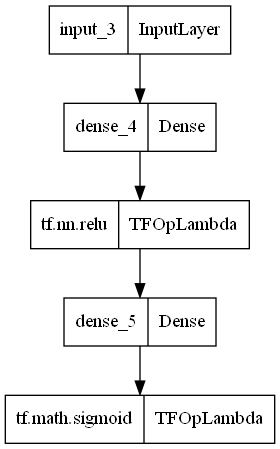

In [12]:
# TODO: To make the following line work you need to install graphviz (if you have not done so in one of the previous classes)
# 1) follow the instructions https://graphviz.gitlab.io/download/?fbclid=IwAR1V-lrRhho5rSfBVYXYISsighqRwOCOgMHLmL_DclkQrPtMXQaKj3mFcqs
# 2) this notebook has been tested with version 8.0.3
# 3) make sure you add it to the PATH variable (you are specifically asked during the installation) at least for local user

tf.keras.utils.plot_model(model)

In [14]:
#pip install pydot

#máme pic, potřebujeme uc fci, kterou se budeme snažit minmalizovat (loss fci)
#budeme měřit distance, 'residuals' (jak daleko je f(x) od y -> L^2 loss, L^1 loss; y je (0,1) psti? -> binary cross entropy
#psti rozdělení -> potřebuju normalizaci + měřit jak moc ten model je dobrej, jak moc y je daleko of f(x) - cross entropy?
#cross entropy: to minus je, abychom věděli, že jsme blizko (bacha neni to symetricke)

#vysvetleni backwards propagation 44:00 -> learning rate schedule

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Model compilation and training

In [13]:
# compile the model with selected optimizer, loss and metrics
model.compile(
        optimizer=tf.optimizers.Adam(), # Several other possibilities for optimizers 
        loss=tf.losses.BinaryCrossentropy(), # Select the proper loss for the task -> spatne se interpretuje
        metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.BinaryAccuracy()], # Select the proper metrics for the task -> pro mimo jine interpretace; accuracy neni derivovatelna
)

#bias je inic na nulu ->predikujeme jedno cislo
#Kernel = matice s nulovym menaem ale nenulovym rozptylem



In [14]:
print('\n>>> Bias of the last layers:')
print(model.layers[3].weights[1].numpy())

print('\n>>> Kernel of the last layers:')
print(model.layers[3].weights[0].numpy())

print('\n>>> Bias of the first layers:')
print(model.layers[1].weights[1].numpy())

print('\n>>> Kernel of the first layers:')
print(model.layers[1].weights[0].numpy())


>>> Bias of the last layers:
[0.]

>>> Kernel of the last layers:
[[ 0.4451117 ]
 [ 0.23111314]
 [ 0.23289865]
 [ 0.08995819]
 [ 0.49771267]
 [-0.12543964]
 [-0.27375042]
 [ 0.20598966]
 [ 0.17502624]
 [-0.56809294]]

>>> Bias of the first layers:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

>>> Kernel of the first layers:
[[-0.3809948  -0.17372632  0.05375606 -0.5305361  -0.43259078 -0.42730772
  -0.13131618  0.15756857  0.15414298 -0.43444675]
 [-0.3255838  -0.13418141 -0.26620016 -0.37388843  0.05313343 -0.10602021
   0.56350815  0.30776167 -0.4465394   0.26346904]
 [ 0.4781897  -0.29810986 -0.4329586   0.30578005 -0.41895714  0.05937368
   0.5087931  -0.16817597 -0.10042152  0.44498324]
 [ 0.07182229 -0.4335553   0.10358101 -0.10615814 -0.20002842 -0.11828491
   0.22891033  0.43155062 -0.01023108  0.06163847]
 [-0.49884307 -0.09520373 -0.044846    0.4039818   0.54779863  0.19957584
   0.21655422 -0.2717062  -0.5425898  -0.40405807]
 [ 0.42414272 -0.13577127  0.18106121 -0.23364168  0.4848702 

In [ ]:
# train the model with default setting
model.fit(X_train, y_train, batch_size=64, epochs=100) #nechceme pocitat pres vsechny data -> minibatche (např po 64)
#počet updatů/61

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.6137 - auc: 0.7608 - binary_accuracy: 0.6576
Epoch 2/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4837 - auc: 0.8639 - binary_accuracy: 0.7938
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4103 - auc: 0.9058 - binary_accuracy: 0.8263
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3596 - auc: 0.9285 - binary_accuracy: 0.8592
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3286 - auc: 0.9393 - binary_accuracy: 0.8740
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3083 - auc: 0.9460 - binary_accuracy: 0.8836
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.2932 - auc: 0.9505 - binary_accuracy: 0.8902
Epoch 8/100
200/200 [==============================] - 1s 4ms/step - loss: 0.2810 - auc: 0.9548 - binary_accuracy: 0.8963
Epoch 9/100
200/200 [===

In [ ]:
# Evaluate the model and predict for the test data
model.evaluate(X_test, y_test)
test_pred = model.predict(X_test)

In [ ]:
for pred, true in zip(test_pred, y_test[0:10]):
    print('{} - {:.2f}'.format(true, pred[0]))

### Add early stopping and regularization

In [ ]:
# Input layer
inputs = tf.keras.Input(shape=(X_train.shape[1]))

# Hidden layer with regularization and ReLU
hidden = tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
hidden = tf.keras.activations.relu(hidden)

# Output layer with regularization and sigmoid
outputs = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.001))(hidden)
outputs = tf.keras.activations.sigmoid(outputs)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='RegularizedModel')

model.compile(
        optimizer=tf.optimizers.Adam(),
        loss=tf.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.AUC(), tf.keras.metrics.BinaryAccuracy()],
)

model.summary()

In [ ]:
epochs = 200

early_call = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

model.fit(X_train,
          y_train,
          epochs=epochs,
          validation_data=(X_dev, y_dev),
          callbacks=[early_call])

### Gridsearch and Tensorboard
Run gridsearch over hidden layer size, L2 regularization, activation, check the outputs in Tensorboard

I recommend not to run Tensorboard from Jupyter notebook but from terminal directly

use "tensorboard --logdir logs" in command line

In [ ]:
# hidden_sizes = [2, 5, 10, 20, 50]
# l2_regs = [0.01, 0.001, 0.0001]
# activations = ['relu', 'tanh']

hidden_sizes = [2, 5]
l2_regs = [0.01]
activations = ['relu', 'tanh']

epochs = 10
batch_size = 64

early_call = tf.keras.callbacks.EarlyStopping(monitor='val_AUC', mode='max', patience=10, restore_best_weights=True)

for activation in activations:
    for l2_reg in l2_regs:
        for hidden_size in hidden_sizes:
            if activation == 'relu':
                activate = tf.keras.activations.relu
            elif activation == 'tanh':
                activate = tf.keras.activations.tanh

            # Create Tensorboard Callback
            param_string = 'act-{},l2-{},hs-{}'.format(activation, l2_reg, hidden_size)
            log_dir = 'logs/binary_classification_test/' + param_string
            tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

            # Input layer
            inputs = tf.keras.Input(shape=(X_train.shape[1]))

            # Hidden layer with regularization and ReLU
            hidden = tf.keras.layers.Dense(hidden_size, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(inputs)
            hidden = activate(hidden)

            # Output layer with regularization and sigmoid
            outputs = tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(hidden)
            outputs = tf.keras.activations.sigmoid(outputs)

            model = tf.keras.Model(inputs=inputs, outputs=outputs, name='RegularizedModel')

            model.compile(
                    optimizer=tf.optimizers.Adam(),
                    loss=tf.losses.BinaryCrossentropy(),
                    metrics=[tf.keras.metrics.AUC(name='AUC'), tf.keras.metrics.BinaryAccuracy()],
            )

            # Train the model
            model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                      validation_data=(X_dev, y_dev),
                      callbacks=[early_call, tensorboard_callback])